In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [3]:
test_results_dir = "../../core/build/test-results/jmc-report"

def read_test_results(file_path):
    data = {
        "random": {},
        "trust": {},
    }
    for dir in os.listdir(file_path):
        if dir.startswith("random"):
            num_threads = int(dir.split("-")[1])
            with open(os.path.join(file_path, dir, "coverage.json")) as f:
                data["random"][num_threads] = json.load(f)
        elif dir.startswith("trust"):
            num_threads = int(dir.split("-")[1])
            with open(os.path.join(file_path, dir, "coverage.json")) as f:
                data["trust"][num_threads] = json.load(f)
    return data

test_data = read_test_results(test_results_dir)
test_data

{'random': {6: {'time': 24401,
   'coverage': [1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35,
    36,
    37,
    38,
    39,
    40,
    41,
    42,
    43,
    44,
    44,
    45,
    46,
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60,
    61,
    62,
    63,
    64,
    65,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    75,
    76,
    77,
    78,
    79,
    80,
    81,
    82,
    83,
    84,
    85,
    86,
    87,
    88,
    89,
    90,
    91,
    92,
    93,
    94,
    95,
    96,
    97,
    98,
    99,
    100,
    101,
    102,
    103,
    104,
    105,
    106,
    107,
    108,
    108,
    109,
    110,
    111,
    112,
    113,
    114,
    11

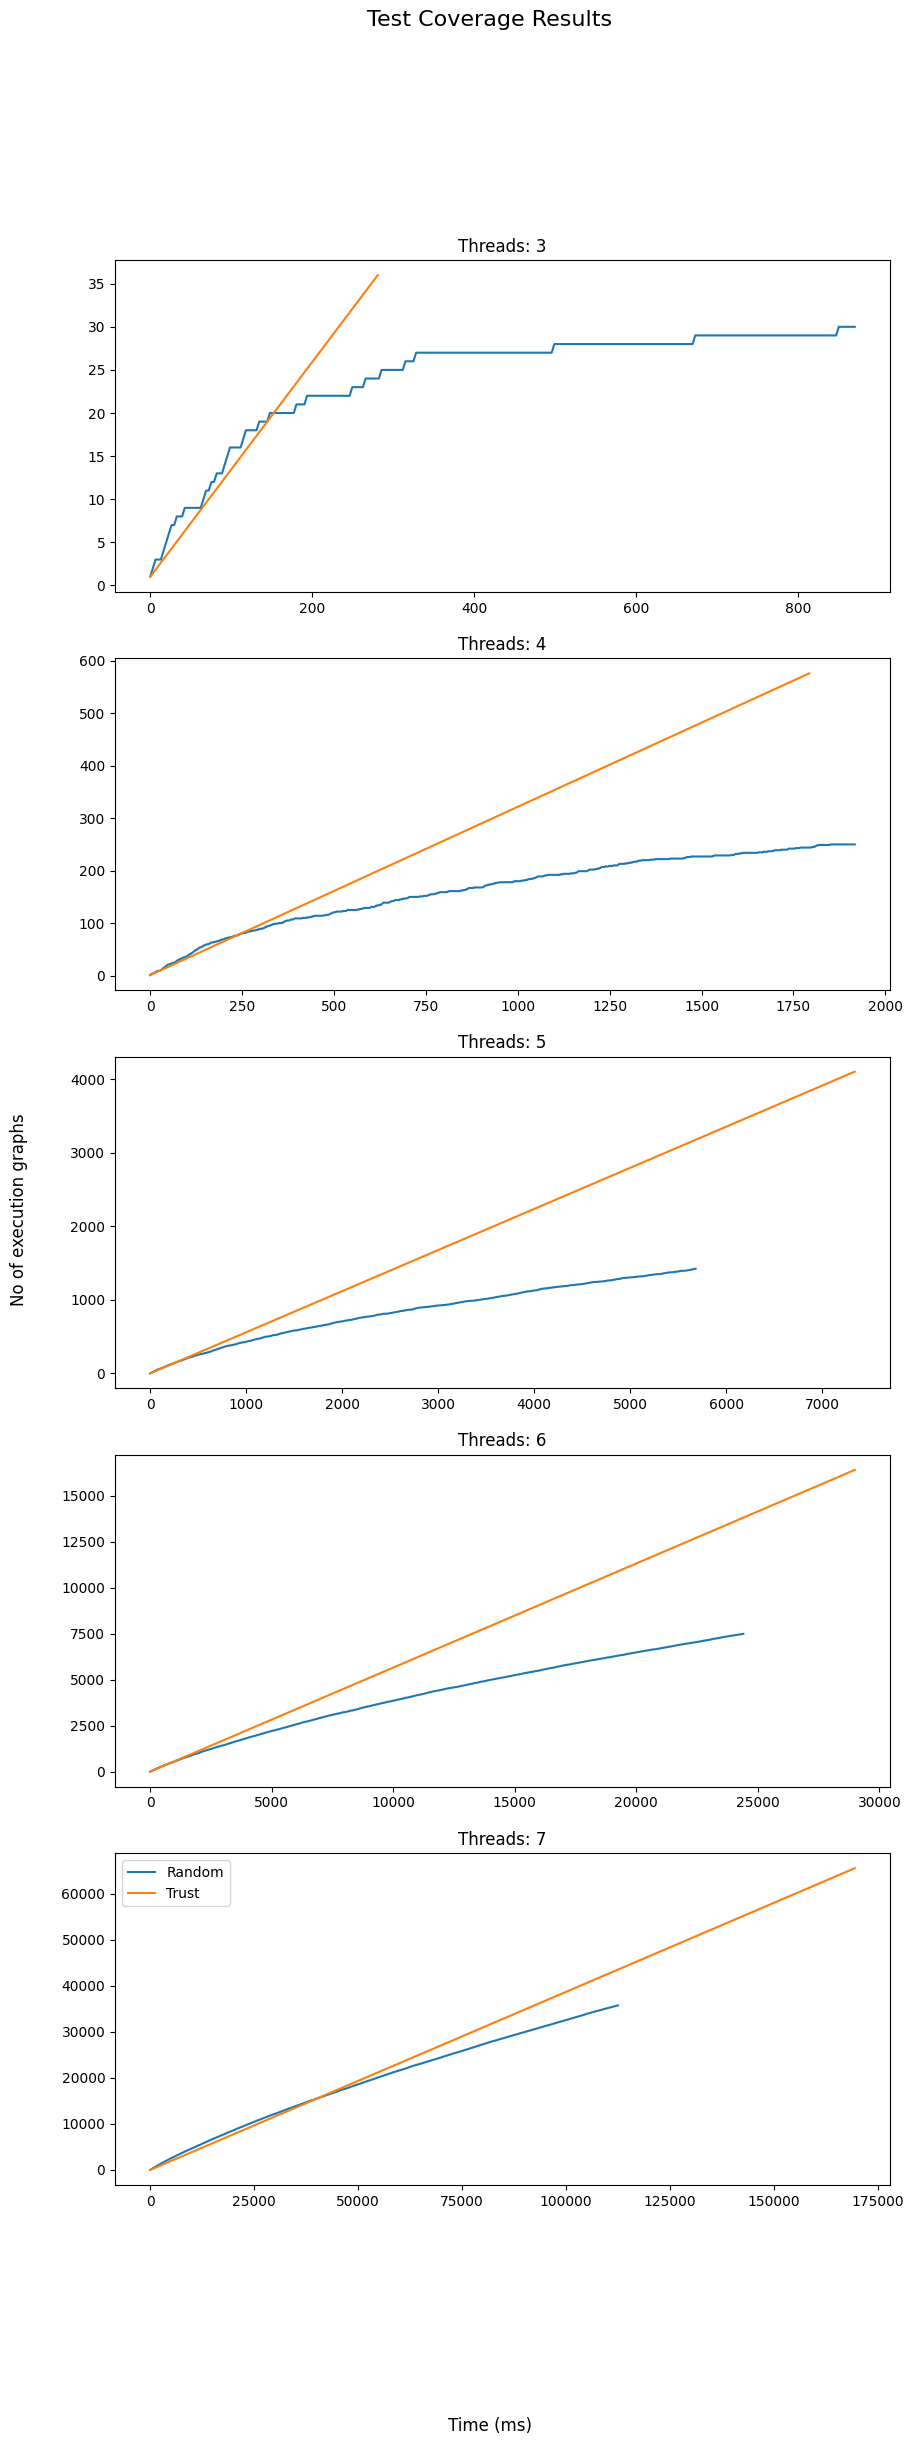

In [4]:
def plot_test_data(data):
    num_plots = len(data["random"].keys())
    fig, axs = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

    fig.suptitle("Test Coverage Results", fontsize=16)
    fig.supxlabel("Time (ms)")
    fig.supylabel("No of execution graphs")

    BASE_THREADS_OFFSET = 3

    for (threads,cov_data) in data["random"].items():
        total_time = cov_data["time"]
        iterations = len(cov_data["coverage"])
        coverage = np.array(cov_data["coverage"])
        x = np.linspace(0, total_time, iterations)
        axs[threads-BASE_THREADS_OFFSET].plot(x, coverage, label="Random")
        axs[threads-BASE_THREADS_OFFSET].set_title(f"Threads: {threads}")
    
    for (threads,cov_data) in data["trust"].items():
        total_time = cov_data["time"]
        iterations = len(cov_data["coverage"])
        coverage = np.array(cov_data["coverage"])
        x = np.linspace(0, total_time, iterations)
        axs[threads-BASE_THREADS_OFFSET].plot(x, coverage, label="Trust")
    
    plt.legend()
    plt.savefig("test_coverage_results.png")

plot_test_data(test_data)
